In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [50]:
df = pd.read_csv('C:/Users/Sandhya/Downloads/archive/sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [51]:
df.shape

(2823, 25)

In [52]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [53]:
num_data = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]
num_data.describe()

,SALES,QUANTITYORDERED,PRICEEACH
count,2823.000000,2823.000000,2823.000000
mean,3553.889072,35.092809,83.658544
std,1841.865106,9.741443,20.174277
min,482.130000,6.000000,26.880000
25%,2203.430000,27.000000,68.860000
50%,3184.800000,35.000000,95.700000
75%,4508.000000,43.000000,100.000000
max,14082.800000,97.000000,100.000000


In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

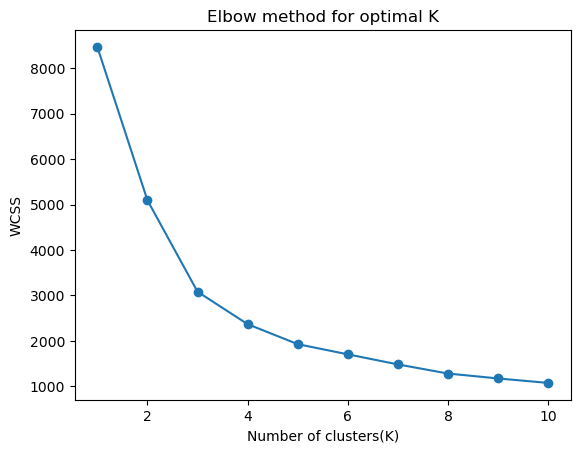

In [55]:
#elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


#plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow method for optimal K")
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.show()

In [56]:
#apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [57]:
# View the clusters
print(df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Cluster']].head())


     SALES  QUANTITYORDERED  PRICEEACH  Cluster
0  2871.00               30      95.70        2
1  2765.90               34      81.35        2
2  3884.34               41      94.74        1
3  3746.70               45      83.26        1
4  5205.27               49     100.00        1


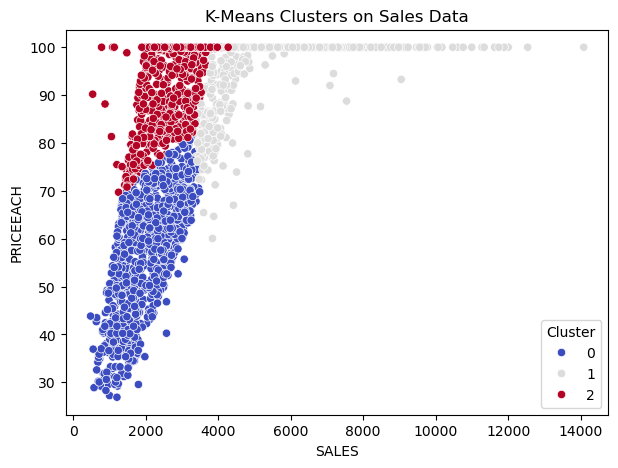

In [58]:
#Visualize the clusters
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['SALES'], 
    y=df['PRICEEACH'], 
    hue=df['Cluster'], 
    palette='coolwarm'
)
plt.title('K-Means Clusters on Sales Data')
plt.show()


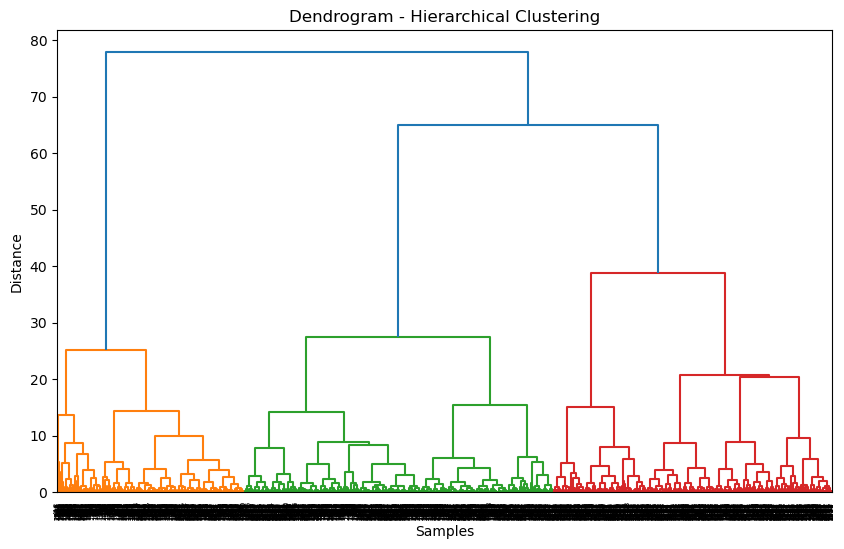

In [48]:
#Hierarchical clustring

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Create linkage matrix
Z = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Form clusters (e.g., 3 clusters)
hier_clusters = fcluster(Z, 3, criterion='maxclust')
df['HierCluster'] = hier_clusters
